# **Proyek Prediksi Analitik: [Diabetes]**

## **Import Library**

In [37]:
# Melakukan import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Wrangling**

### **Gathering Data**

In [2]:
diabetes_df = pd.read_csv("data/diabetes-dataset.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Assessing Data**

In [4]:
# Mendapatkan informasi dari dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Mengecek apakah ada data yang kosong
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Menghitung jumlah duplikasi data
print("Jumlah duplikasi:", diabetes_df.duplicated().sum())

Jumlah duplikasi: 0


## **Exploratory Data Analysis (EDA)**

In [9]:
# Melihat informasi deskriptif data
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Menyimpan daftar kolom
df_columns = diabetes_df.columns

# Melakukan perulangan untuk menghitung nilai skewness tiap kolom
for col in df_columns:
    series = pd.Series(np.array(diabetes_df[col]))
    print(f"{col}: {series.skew()}")

Pregnancies: 0.9016739791518588
Glucose: 0.17375350179188992
BloodPressure: -1.8436079833551302
SkinThickness: 0.10937249648187608
Insulin: 2.272250858431574
BMI: -0.42898158845356543
DiabetesPedigreeFunction: 1.919911066307204
Age: 1.1295967011444805
Outcome: 0.635016643444986


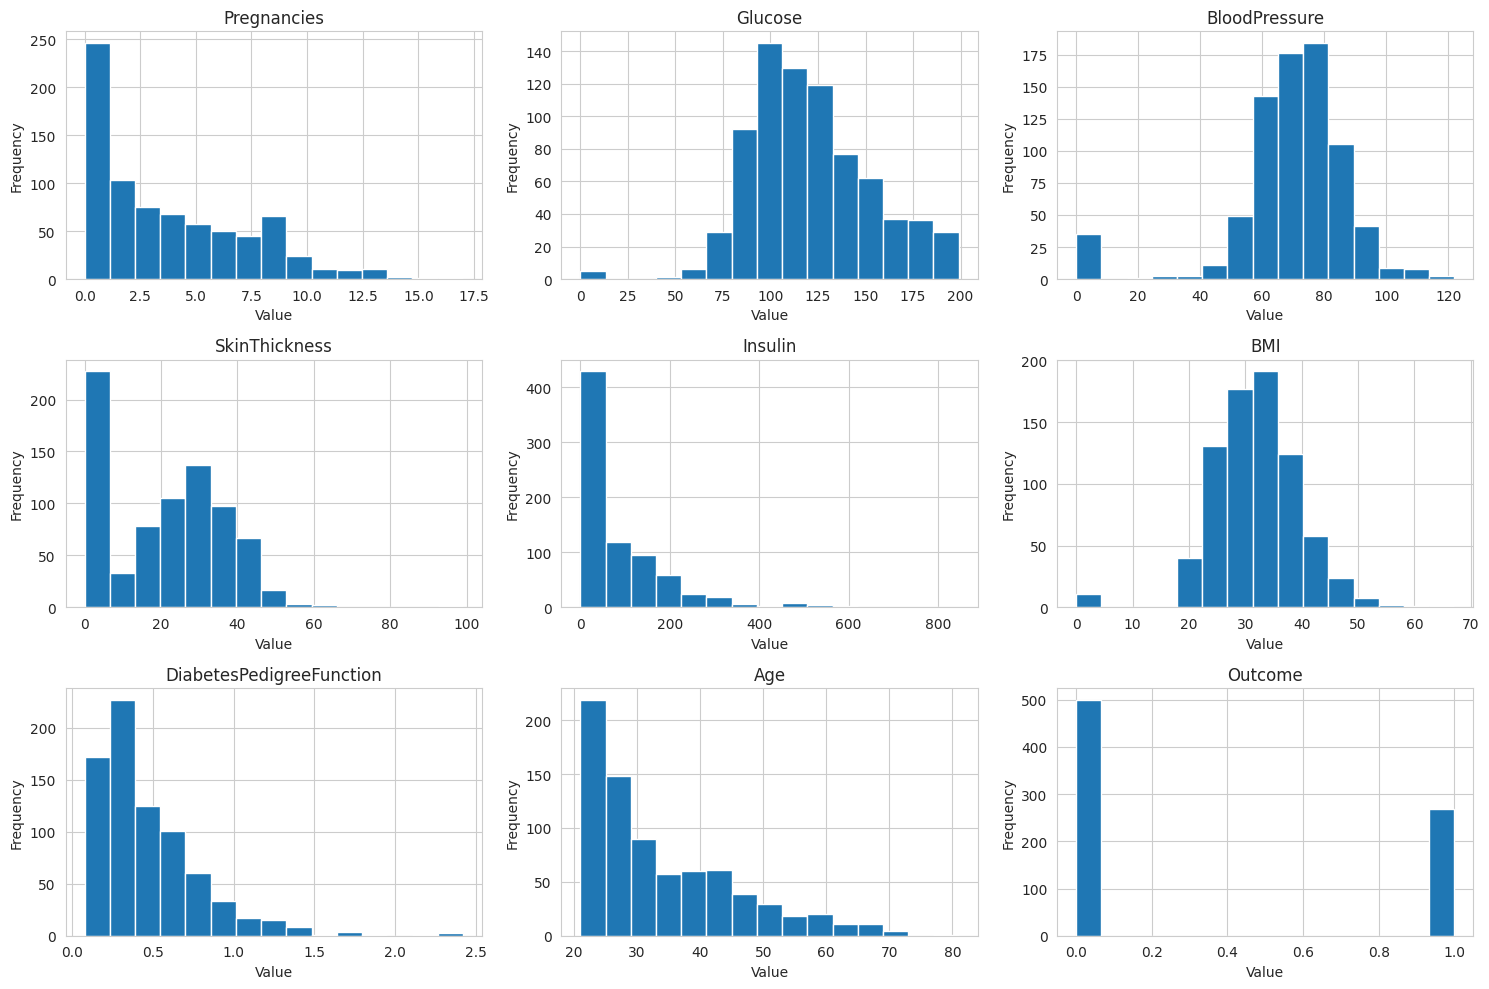

In [52]:
# Membuat subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Melakukan flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap kolom
for i, column in enumerate(diabetes_df.columns):
    diabetes_df[column].hist(ax=axes[i], bins=15)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

In [12]:
# Mengecek korelasi dengan fungsi corr()
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


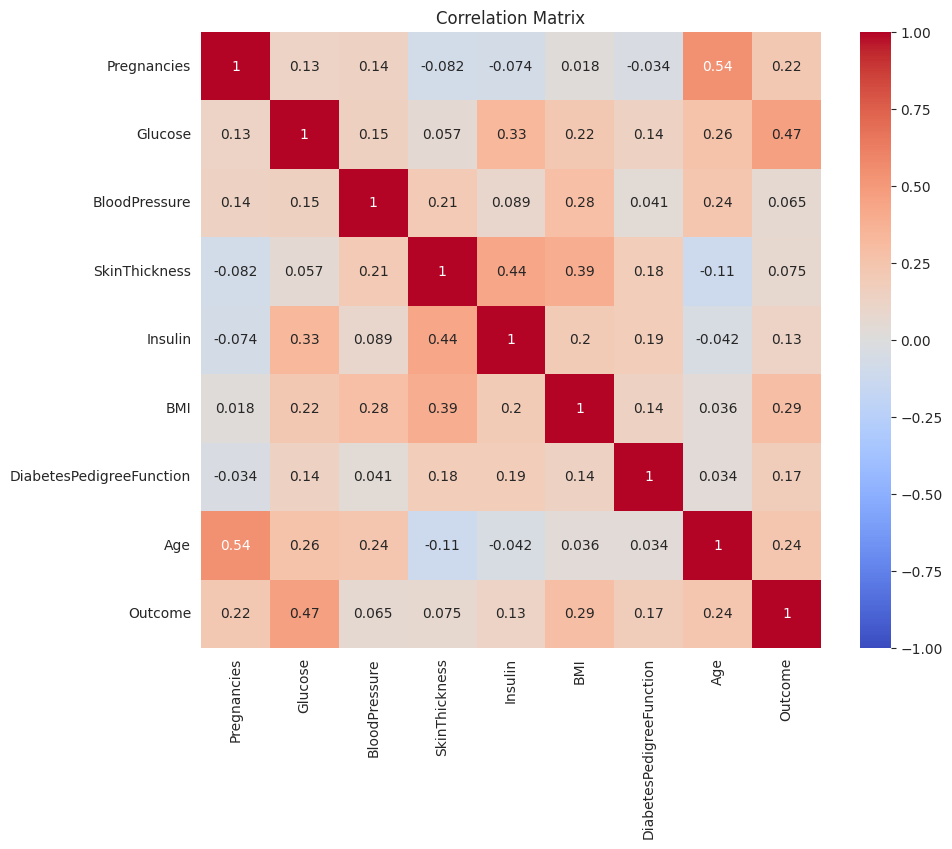

In [62]:
# Visualisasi korelasi antar variabel numerik
def show_corr_matrix(data):
    plt.figure(figsize=(10, 8))
    corr_matrix = data.corr(numeric_only=True)

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()


show_corr_matrix(diabetes_df)

In [17]:
# Menggunakan value_counts() untuk menghitung jumlah data berdasarkan Outcome
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

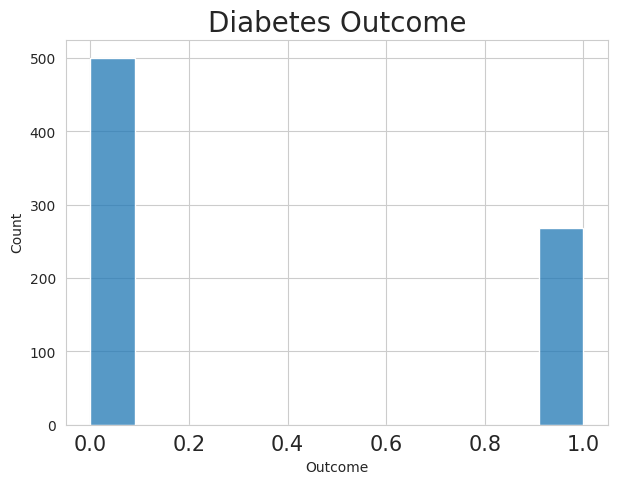

In [75]:
plt.figure(figsize=(7, 5))
sns.histplot(x="Outcome", data=diabetes_df)

plt.title("Diabetes Outcome", fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.show()

In [78]:
# Membuat fungsi untuk menentukan kategori berdasarkan rentang umur
def check_age(age):
    if age < 25:
        return "youth"
    elif 25 <= age < 37:
        return "maturity"
    elif 37 <= age < 49:
        return "middle-maturity"
    elif 49 <= age < 61:
        return "full-maturity"
    else:
        return "elderly"


# Membuat DataFrame baru age_df
age_df = diabetes_df.copy()

# Mengecek kategori umur berdasarkan rentang umur
age_df['Age'] = age_df['Age'].apply(check_age)

# Menghitung hasil diabetes berdasarkan kategori umur
age_df.groupby(by=['Age', 'Outcome'])['Outcome'].count()

Age              Outcome
elderly          0           20
                 1            7
full-maturity    0           28
                 1           39
maturity         0          185
                 1          110
middle-maturity  0           79
                 1           81
youth            0          188
                 1           31
Name: Outcome, dtype: int64

In [107]:
# Mengecek jumlah data berdasarkan kategori umur
age_df['Age'].value_counts()

Age
maturity           295
youth              219
middle-maturity    160
full-maturity       67
elderly             27
Name: count, dtype: int64

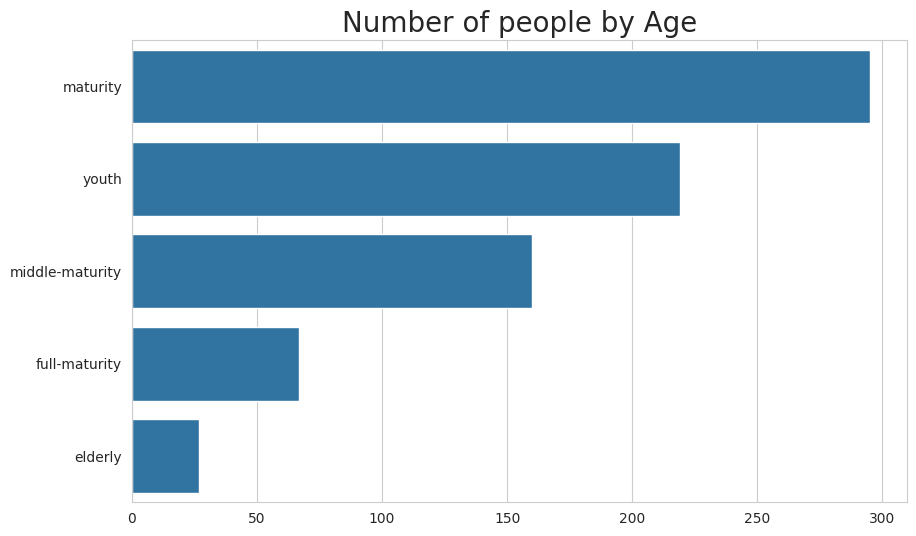

In [209]:
age_count = age_df['Age'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count',
    y='Age',
    data=age_count,
    errorbar=None,
)

plt.title("Number of people by Age", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

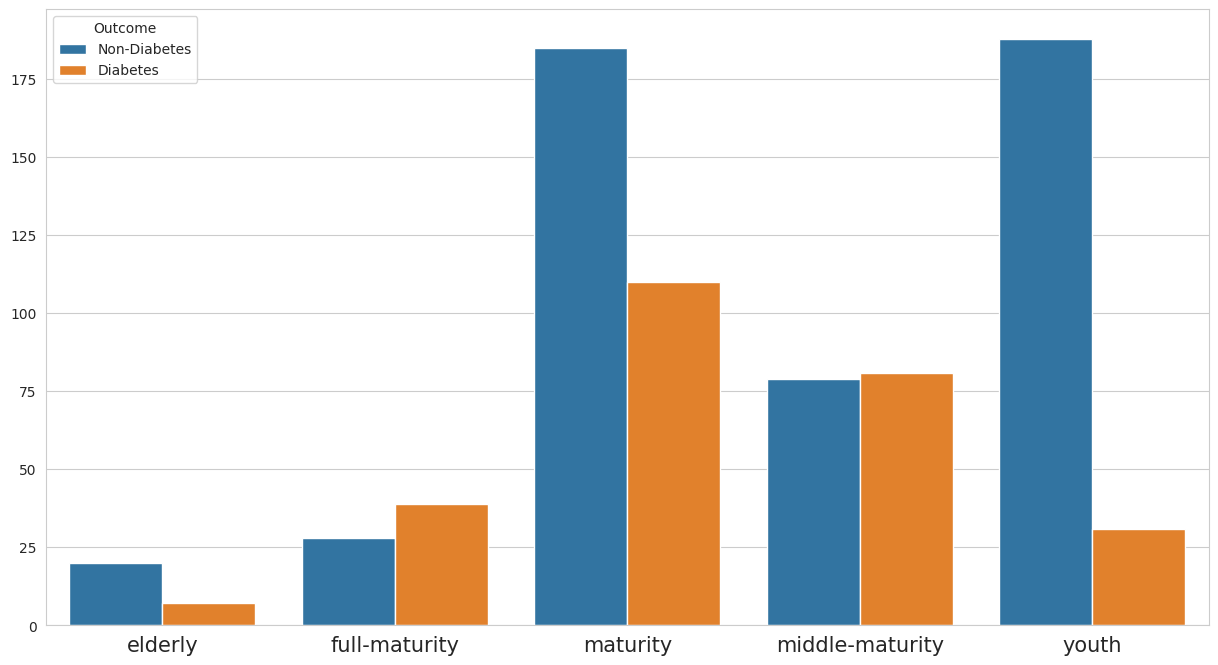

In [213]:
# Melihat demografi penderita diabetes dan non-diabetes berdasarkan umur
byage_df = age_df.groupby(by=['Age', 'Outcome']).size().reset_index(name='Count')
byage_df['Outcome'] = byage_df['Outcome'].map({0: "Non-Diabetes", 1: "Diabetes"})

plt.figure(figsize=(15, 8))

sns.barplot(
    y="Count",
    x="Age",
    hue='Outcome',
    data=byage_df,
    errorbar=None,
)

plt.tick_params(axis='x', labelsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [42]:
# Membuat fungsi untuk menentukan kategori berdasarkan rentang tekanan darah
def check_blood_pressure(blood_pressure):
    if blood_pressure < 80:
        return "normal"
    elif 80 <= blood_pressure <= 89:
        return "pre-hypertension"
    elif 90 <= blood_pressure <= 99:
        return "stage-1-hypertension"
    else:
        return "stage-2-hypertension"


blood_pressure_df = diabetes_df.copy()
blood_pressure_df['BloodPressure'] = blood_pressure_df['BloodPressure'].apply(check_blood_pressure)

blood_pressure_df['BloodPressure'].value_counts()

BloodPressure
normal                  563
pre-hypertension        145
stage-1-hypertension     44
stage-2-hypertension     16
Name: count, dtype: int64

In [48]:
# Membuat fungsi untuk menentukan kategori berdasarkan BMI
def check_bmi(bmi):
    if bmi < 18.5:
        return "underweight"
    elif 18.5 <= bmi <= 24.9:
        return "normal"
    elif 25 <= bmi <= 29.9:
        return "overweight"
    else:
        return "obese"


bmi_df = diabetes_df.copy()
bmi_df['BMI'] = bmi_df["BMI"].apply(check_bmi)

bmi_df["BMI"].value_counts()

BMI
obese          472
overweight     179
normal         102
underweight     15
Name: count, dtype: int64

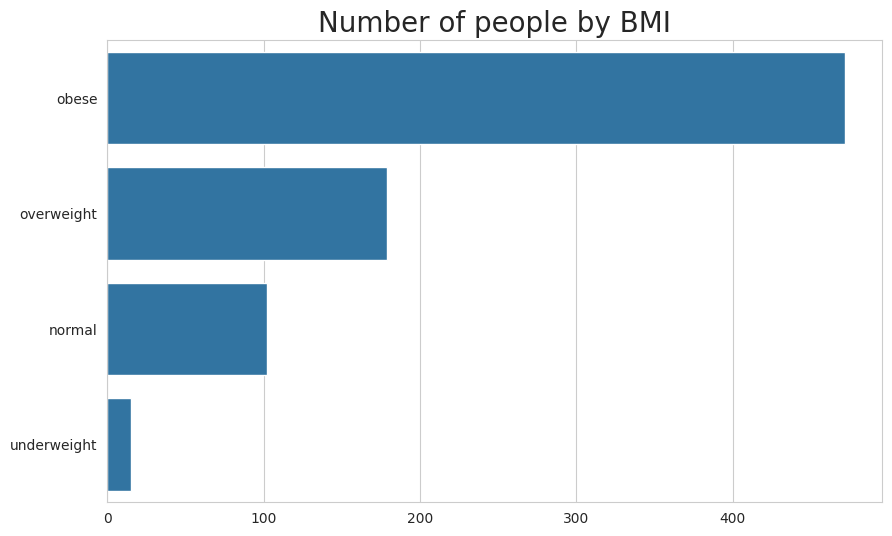

In [212]:
bmi_count = bmi_df['BMI'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))

sns.barplot(
    y='BMI',
    x='Count',
    data=bmi_count,
    errorbar=None,
)

plt.title("Number of people by BMI", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [130]:
# Menampilkan hasil diabetes berdasarkan BMI
bmi_df.groupby(by=['BMI', 'Outcome'])['Outcome'].count()

BMI          Outcome
normal       0           95
             1            7
obese        0          253
             1          219
overweight   0          139
             1           40
underweight  0           13
             1            2
Name: Outcome, dtype: int64

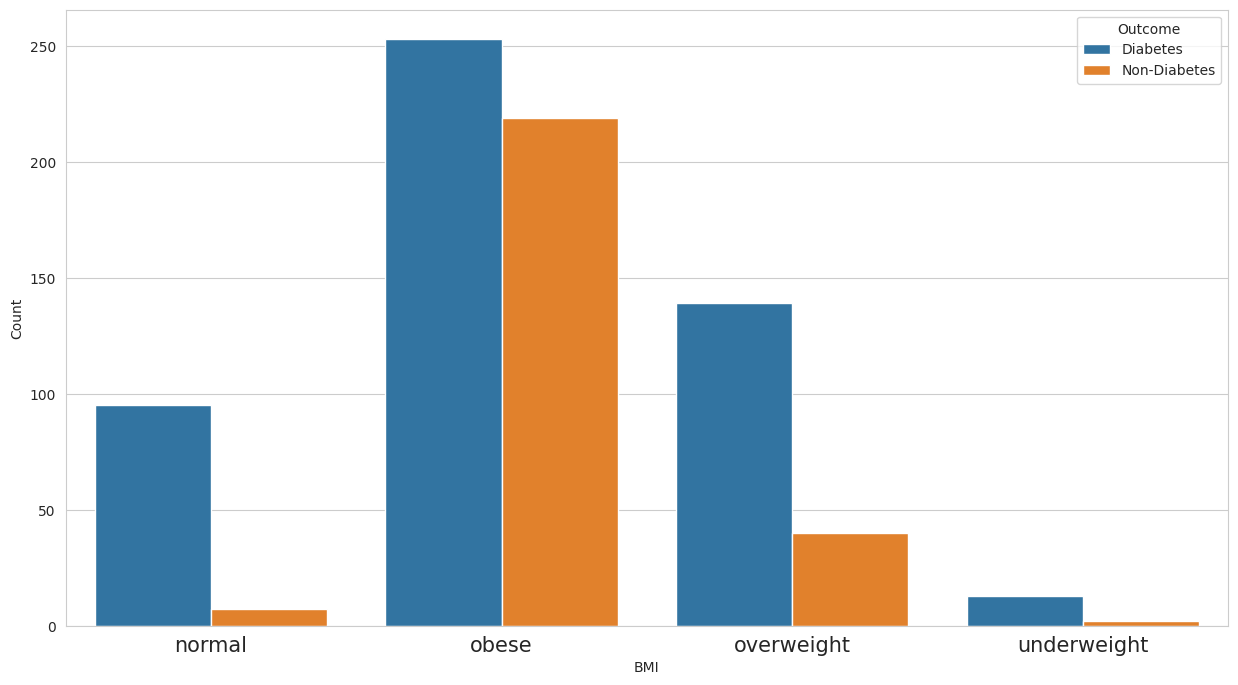

In [181]:
# Melihat demografi penderita diabetes dan non-diabetes berdasarkan BMI
bybmi_df = bmi_df.groupby(by=['BMI', 'Outcome']).size().reset_index(name='Count')
bybmi_df['Outcome'] = bmi_df['Outcome'].map({0: "Non-Diabetes", 1: "Diabetes"})

plt.figure(figsize=(15, 8))

sns.barplot(
    y='Count',
    x='BMI',
    hue='Outcome',
    data=bybmi_df,
    errorbar=None
)

plt.tick_params(axis='x', labelsize=15)
plt.show()

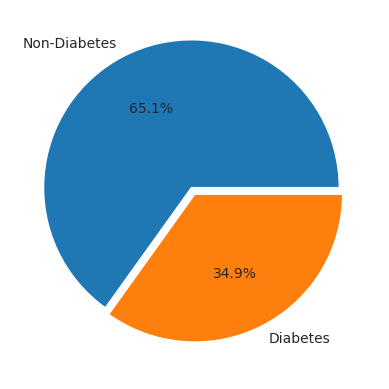

In [128]:
# Menghitung jumlah data berdasarkan hasil diabetes (0 dan 1)
outcome_count = diabetes_df['Outcome'].value_counts().tolist()

plt.pie(
    x=outcome_count,
    labels=('Non-Diabetes', 'Diabetes'),
    autopct='%1.1f%%',
    explode=(0.05, 0)
)

plt.show()

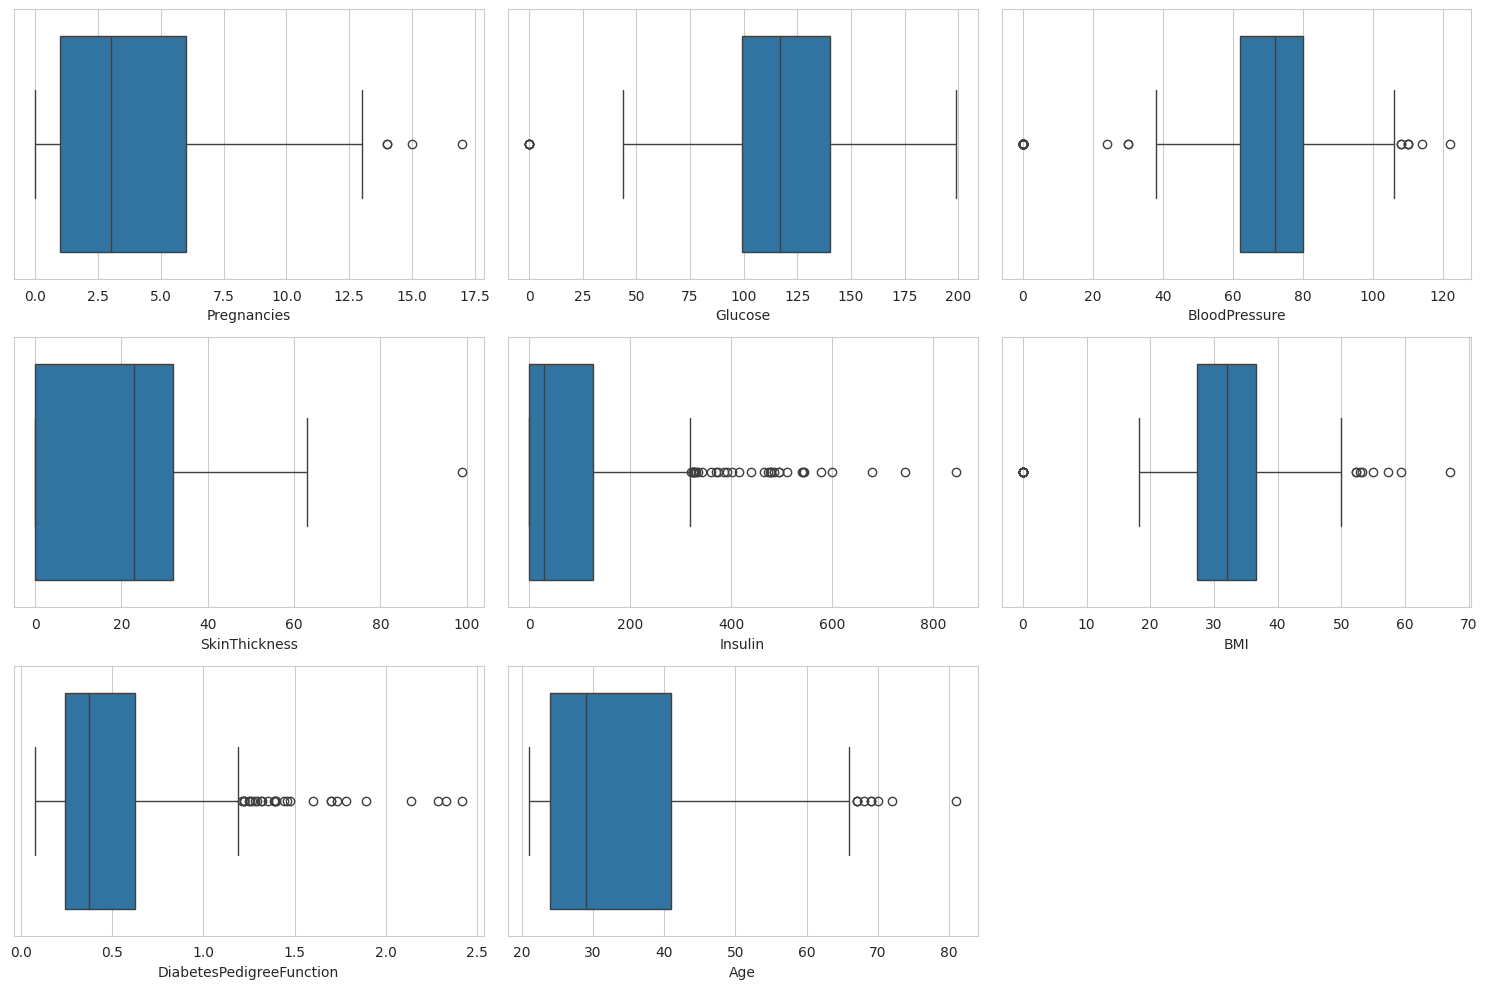

In [195]:
# Melihat distribusi pada data kuantitatif
df_columns = diabetes_df.drop(columns=['Outcome']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(df_columns):
    sns.boxplot(x=diabetes_df[column], ax=axes[i])

# Menghapus subplot yang tidak terpakai jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

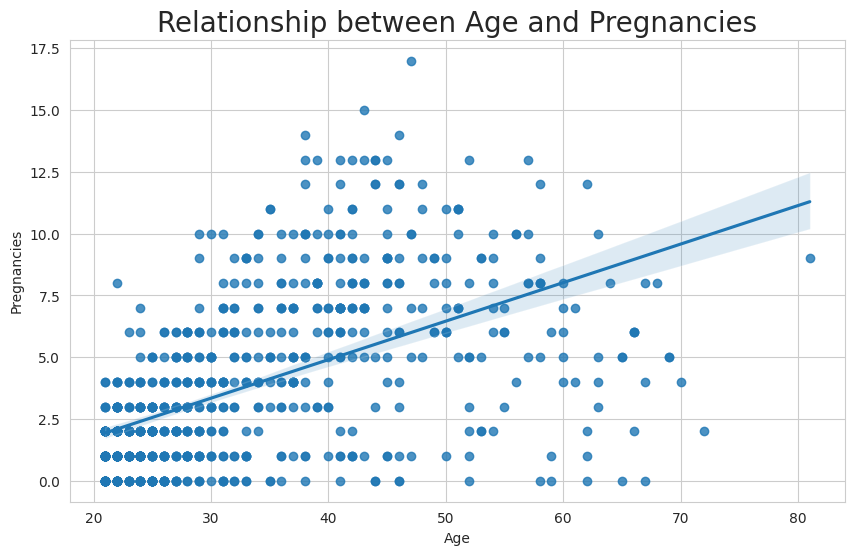

In [220]:
# Melihat hubungan antara umur dengan jumlah kehamilan
plt.figure(figsize=(10, 6))
sns.regplot(x="Age", y="Pregnancies", data=diabetes_df)

plt.title("Relationship between Age and Pregnancies", fontsize=20)
plt.show()

## **Data Preparation**

## **Building Model**

## **Evaluation Model**

## **Tuning Model**

## **Testing Model**